In [16]:
!pip install pymatgen seaborn

In [17]:
# imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from pymatgen.core import Structure

plt.style.use('default')
sns.set_palette("husl")

In [18]:

cif_file = '../test_set_cifs/DB0-m1_o6_o6_f0_pcu_repeat.cif'

if os.path.exists(cif_file):
    structure = Structure.from_file(cif_file)
    print(f"Formula: {structure.composition}")
    print(f"Density: {structure.density:.2f} g/cm³")
    print(f"Number of atoms: {len(structure)}")
    print(f"Lattice parameters: a={structure.lattice.a:.2f}, b={structure.lattice.b:.2f}, c={structure.lattice.c:.2f}")
    print(f"Volume: {structure.volume:.2f} Ų")
    print(f"Space group: {structure.get_space_group_info()}")
else:
    print(f"File not found: {cif_file}")
    print("Available files in test_set_cifs:")
    if os.path.exists('../test_set_cifs/'):
        for f in os.listdir('../test_set_cifs/')[:5]:  # Show first 5 files
            print(f"  {f}")

Formula: Zn32 H96 C288 O104
Density: 0.25 g/cm³
Number of atoms: 520
Lattice parameters: a=36.58, b=36.58, c=36.58
Volume: 48942.74 Ų
Space group: ('Fm-3m', 225)


In [19]:


cif_directory = '../test_set_cifs/'
results = []

if os.path.exists(cif_directory):
    cif_files = [f for f in os.listdir(cif_directory) if f.endswith('.cif')][:5]
    
    for cif_file in cif_files:
        try:
            structure = Structure.from_file(os.path.join(cif_directory, cif_file))
            results.append({
                'filename': cif_file,
                'formula': str(structure.composition.reduced_formula),
                'density': round(structure.density, 2),
                'volume': round(structure.volume, 2),
                'num_atoms': len(structure),
                'a_param': round(structure.lattice.a, 2)
            })
        except Exception as e:
            print(f"Error processing {cif_file}: {e}")
    
    # Create DataFrame
    if results:
        df = pd.DataFrame(results)
        print("MOF Structure Analysis:")
        print(df.to_string(index=False))
    else:
        print("No structures could be processed")
else:
    print(f"Directory not found: {cif_directory}")

MOF Structure Analysis:
                             filename             formula  density   volume  num_atoms  a_param
DB1-NiN6-irmof6_A-NiC4_No9_repeat.cif            NiH4C5N4     1.55   383.22         28    10.24
            DB7-ddmof_1018_repeat.cif        Ni2H7C21O7F6     0.40 39867.79        688    35.51
            DB14-gonnaa_P1_repeat.cif Zn3H40C26N20(ClO2)2     1.36  4723.07        380    15.73
            DB14-rixbeg_P1_repeat.cif       MnH19C24SN4O7     1.25  5988.80        448    25.23
             DB7-ddmof_897_repeat.cif    Ni4H27C76(O7F6)2     0.27 40678.84        532    28.26


/Users/omarshehab/Desktop/Summer Research 2025/ARC Dataset/.venv/lib/python3.9/site-packages/pymatgen/io/cif.py:1287: UserWarning: Issues encountered while parsing CIF: 4 fractional coordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: " + "\n".join(self.warnings))


=== SELECTED DATA ANALYSIS ===
Dataset shape: (258212, 104)
Columns: ['Folder Name', 'Geometry_vASA', 'MagpieData range MendeleevNumber', 'Geometry_AVAf', 'MagpieData minimum NUnfilled', 'RDF_polarizability_6.783', 'Geometry_POAVAg', 'Geometry_gASA', 'MagpieData maximum NdUnfilled', 'Geometry_ASA', 'RDF_vdWaalsVolume_2.531', 'RDF_electronegativity_3.925', 'RDF_polarizability_8.815', 'RDF_vdWaalsVolume_2.199', 'RDF_vdWaalsVolume_3.221', 'RAC_D_mc-S-1-all', 'Oxygen_to_Metal_Ratio', 'RDF_electronegativity_3.673', 'RDF_electronegativity_10.368', 'RDF_none_9.062', 'RDF_mass_2.000', 'RDF_mass_6.186', 'RDF_vdWaalsVolume_3.022', 'RDF_mass_2.602', 'RDF_polarizability_11.492', 'RDF_polarizability_2.677', 'MagpieData mean MendeleevNumber', 'MagpieData avg_dev Electronegativity', 'RDF_polarizability_10.921', 'RAC_D_mc-chi-3-all', 'Geometry_Di', 'RDF_mass_3.673', 'RDF_electronegativity_8.098', 'MagpieData mean GSbandgap', 'RAC_f-I-0-all', 'RDF_polarizability_3.221', 'RAC_lc-I-1-all', 'RDF_vdWaalsVo

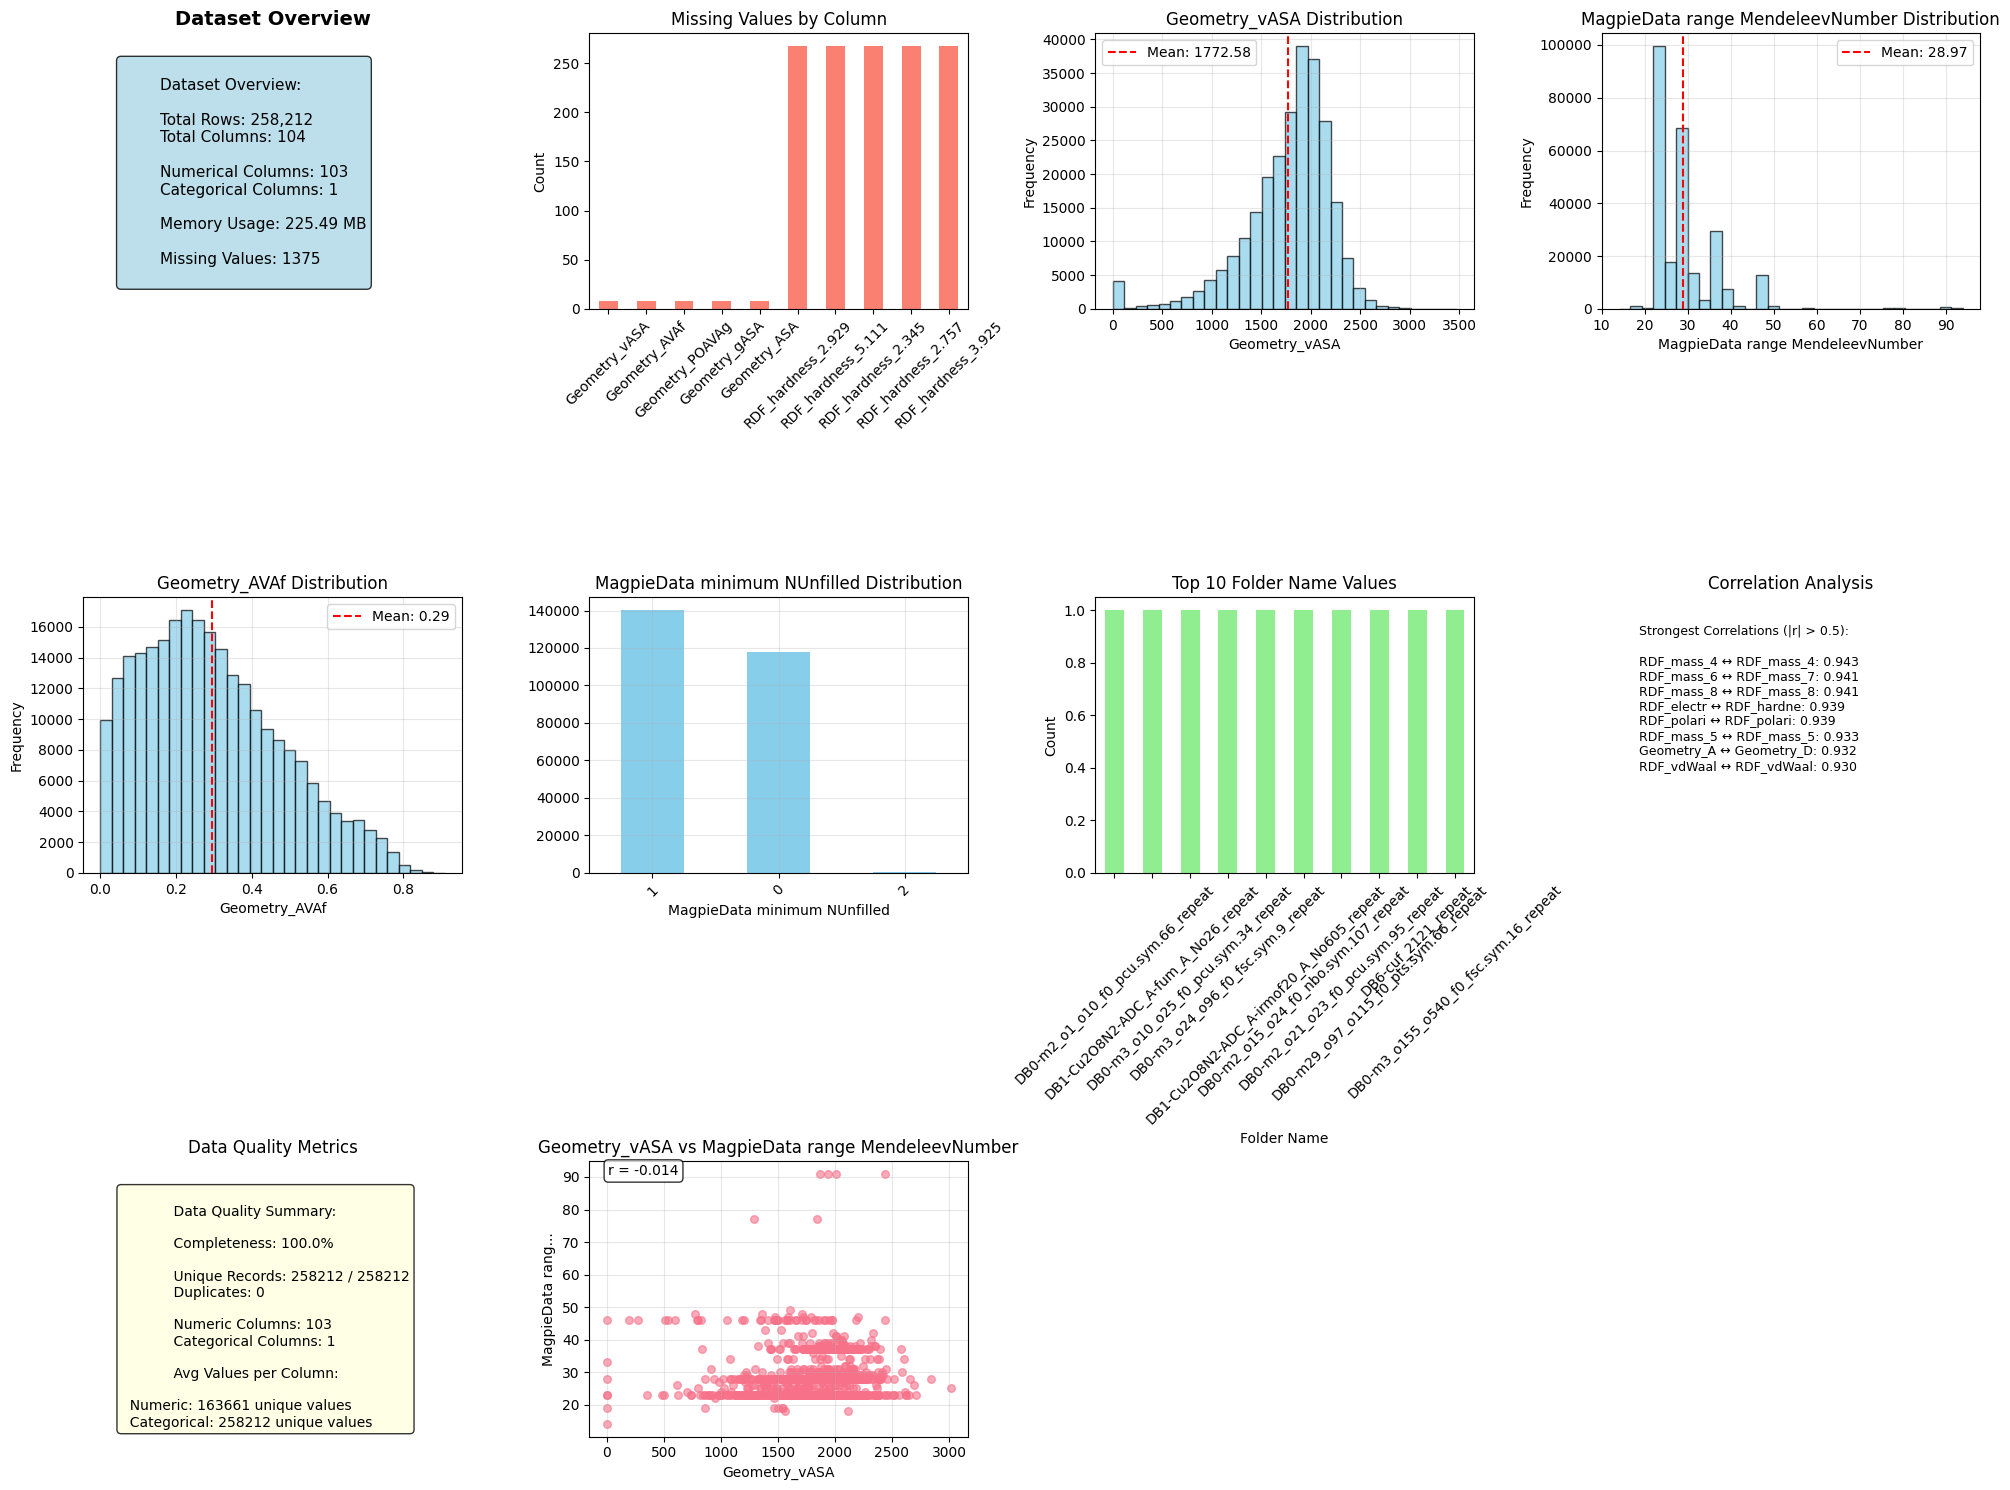


=== DETAILED STATISTICS ===

Numerical columns summary:
       Geometry_vASA  MagpieData range MendeleevNumber  Geometry_AVAf  \
count  258204.000000                     258212.000000  258204.000000   
mean     1772.577004                         28.966504       0.294264   
std       443.174547                          8.073923       0.183869   
min         0.000000                         14.000000       0.000000   
25%      1569.290000                         23.000000       0.149280   
50%      1865.165000                         28.000000       0.269600   
75%      2057.960000                         30.000000       0.415060   
max      3474.600000                         94.000000       0.908900   

       MagpieData minimum NUnfilled  RDF_polarizability_6.783  \
count                 258212.000000             258212.000000   
mean                       0.544165                  0.002895   
std                        0.499770                  0.001141   
min                      

In [20]:
csv_file = '../selected data/selected_data.csv'
# Add this as a new cell after cell 5
def analyze_selected_data(df):
    """Analyze the selected_data.csv file with appropriate visualizations"""
    
    print("=== SELECTED DATA ANALYSIS ===")
    print(f"Dataset shape: {df.shape}")
    print(f"Columns: {list(df.columns)}")
    print(f"Data types:\n{df.dtypes}")
    print("\nFirst 10 rows:")
    print(df.head(10))
    
    # Get column types
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
    
    print(f"\nNumerical columns ({len(numerical_cols)}): {numerical_cols}")
    print(f"Categorical columns ({len(categorical_cols)}): {categorical_cols}")
    
    # Create visualizations based on what data we actually have
    if len(numerical_cols) > 0 or len(categorical_cols) > 0:
        # Calculate number of plots needed
        num_plots = min(12, len(numerical_cols) * 2 + len(categorical_cols) + 2)
        
        fig = plt.figure(figsize=(20, 15))
        plot_idx = 1
        
        # 1. Dataset overview
        plt.subplot(3, 4, plot_idx)
        plt.axis('off')
        overview_text = f"""
        Dataset Overview:
        
        Total Rows: {len(df):,}
        Total Columns: {len(df.columns)}
        
        Numerical Columns: {len(numerical_cols)}
        Categorical Columns: {len(categorical_cols)}
        
        Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB
        
        Missing Values: {df.isnull().sum().sum()}
        """
        plt.text(0.1, 0.9, overview_text, fontsize=11, verticalalignment='top',
                bbox=dict(boxstyle="round", facecolor='lightblue', alpha=0.8))
        plt.title('Dataset Overview', fontsize=14, fontweight='bold')
        plot_idx += 1
        
        # 2. Missing values visualization
        plt.subplot(3, 4, plot_idx)
        missing_data = df.isnull().sum()
        if missing_data.sum() > 0:
            missing_cols = missing_data[missing_data > 0]
            if len(missing_cols) <= 10:  # Only plot if not too many columns
                missing_cols.plot(kind='bar', color='salmon')
                plt.title('Missing Values by Column')
                plt.xticks(rotation=45)
                plt.ylabel('Count')
            else:
                plt.text(0.5, 0.5, f'Missing values in\n{len(missing_cols)} columns\nTotal: {missing_data.sum():,}', 
                        ha='center', va='center', transform=plt.gca().transAxes,
                        bbox=dict(boxstyle="round", facecolor='salmon', alpha=0.7))
                plt.title('Missing Values Summary')
        else:
            plt.text(0.5, 0.5, 'No Missing Values ✓', ha='center', va='center', 
                    transform=plt.gca().transAxes, fontsize=14, color='green', fontweight='bold')
            plt.title('Missing Values Check')
        plt.axis('off') if missing_data.sum() == 0 else None
        plot_idx += 1
        
        # 3-6. Numerical column distributions
        for i, col in enumerate(numerical_cols[:4]):
            if plot_idx > 12:
                break
            plt.subplot(3, 4, plot_idx)
            
            # Check if column has reasonable number of unique values for histogram
            unique_vals = df[col].nunique()
            if unique_vals > 1:
                if unique_vals <= 20:  # Discrete data
                    df[col].value_counts().head(15).plot(kind='bar', color='skyblue')
                    plt.title(f'{col} Distribution')
                    plt.xticks(rotation=45)
                else:  # Continuous data
                    plt.hist(df[col].dropna(), bins=min(30, unique_vals//2), 
                            alpha=0.7, edgecolor='black', color='skyblue')
                    plt.axvline(df[col].mean(), color='red', linestyle='--', 
                                label=f'Mean: {df[col].mean():.2f}')
                    plt.title(f'{col} Distribution')
                    plt.xlabel(col)
                    plt.ylabel('Frequency')
                    plt.legend()
            else:
                plt.text(0.5, 0.5, f'Constant value:\n{df[col].iloc[0]}', 
                        ha='center', va='center', transform=plt.gca().transAxes)
                plt.title(f'{col} (Constant)')
            
            plt.grid(True, alpha=0.3)
            plot_idx += 1
        
        # 7-9. Categorical column distributions
        for i, col in enumerate(categorical_cols[:3]):
            if plot_idx > 12:
                break
            plt.subplot(3, 4, plot_idx)
            
            value_counts = df[col].value_counts().head(10)
            if len(value_counts) > 0:
                if len(value_counts) <= 8:
                    value_counts.plot(kind='pie', autopct='%1.1f%%')
                    plt.title(f'{col} Distribution')
                    plt.ylabel('')
                else:
                    value_counts.plot(kind='bar', color='lightgreen')
                    plt.title(f'Top 10 {col} Values')
                    plt.xticks(rotation=45)
                    plt.ylabel('Count')
            else:
                plt.text(0.5, 0.5, 'No data', ha='center', va='center', 
                        transform=plt.gca().transAxes)
                plt.title(f'{col} (No Data)')
            plot_idx += 1
        
        # 10. Correlation heatmap (if we have multiple numerical columns)
        if len(numerical_cols) >= 2 and plot_idx <= 12:
            plt.subplot(3, 4, plot_idx)
            corr_matrix = df[numerical_cols].corr()
            
            # Only show heatmap if manageable size
            if len(numerical_cols) <= 10:
                im = plt.imshow(corr_matrix, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
                plt.colorbar(im, shrink=0.8)
                plt.xticks(range(len(numerical_cols)), 
                          [col[:8] + '...' if len(col) > 8 else col for col in numerical_cols], 
                          rotation=45)
                plt.yticks(range(len(numerical_cols)), 
                          [col[:8] + '...' if len(col) > 8 else col for col in numerical_cols])
                
                # Add correlation values for small matrices
                if len(numerical_cols) <= 6:
                    for i in range(len(numerical_cols)):
                        for j in range(len(numerical_cols)):
                            plt.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}', 
                                    ha='center', va='center', fontsize=8)
                
                plt.title('Correlation Matrix')
            else:
                # Too many columns, show text summary
                strongest_corrs = []
                for i in range(len(numerical_cols)):
                    for j in range(i+1, len(numerical_cols)):
                        corr_val = corr_matrix.iloc[i, j]
                        if abs(corr_val) > 0.5:  # Strong correlation
                            strongest_corrs.append((numerical_cols[i], numerical_cols[j], corr_val))
                
                strongest_corrs.sort(key=lambda x: abs(x[2]), reverse=True)
                
                text = "Strongest Correlations (|r| > 0.5):\n\n"
                for col1, col2, corr in strongest_corrs[:8]:
                    text += f"{col1[:10]} ↔ {col2[:10]}: {corr:.3f}\n"
                
                if not strongest_corrs:
                    text = "No strong correlations found\n(all |r| ≤ 0.5)"
                
                plt.text(0.1, 0.9, text, fontsize=9, verticalalignment='top',
                        transform=plt.gca().transAxes)
                plt.title('Correlation Analysis')
                plt.axis('off')
            plot_idx += 1
        
        # 11. Data quality summary
        if plot_idx <= 12:
            plt.subplot(3, 4, plot_idx)
            plt.axis('off')
            
            # Calculate data quality metrics
            completeness = (1 - df.isnull().sum().sum() / (len(df) * len(df.columns))) * 100
            
            quality_text = f"""
            Data Quality Summary:
            
            Completeness: {completeness:.1f}%
            
            Unique Records: {len(df.drop_duplicates())} / {len(df)}
            Duplicates: {len(df) - len(df.drop_duplicates())}
            
            Numeric Columns: {len(numerical_cols)}
            Categorical Columns: {len(categorical_cols)}
            
            Avg Values per Column:
            """
            
            # Add average unique values per column type
            if numerical_cols:
                avg_unique_num = df[numerical_cols].nunique().mean()
                quality_text += f"\n  Numeric: {avg_unique_num:.0f} unique values"
            
            if categorical_cols:
                avg_unique_cat = df[categorical_cols].nunique().mean()
                quality_text += f"\n  Categorical: {avg_unique_cat:.0f} unique values"
            
            plt.text(0.1, 0.9, quality_text, fontsize=10, verticalalignment='top',
                    bbox=dict(boxstyle="round", facecolor='lightyellow', alpha=0.8))
            plt.title('Data Quality Metrics')
            plot_idx += 1
        
        # 12. Sample relationships (scatter plot of first 2 numerical columns)
        if len(numerical_cols) >= 2 and plot_idx <= 12:
            plt.subplot(3, 4, plot_idx)
            col1, col2 = numerical_cols[0], numerical_cols[1]
            
            # Sample data if too many points
            sample_size = min(1000, len(df))
            df_sample = df.sample(n=sample_size) if len(df) > sample_size else df
            
            plt.scatter(df_sample[col1], df_sample[col2], alpha=0.6, s=30)
            plt.xlabel(col1[:15] + '...' if len(col1) > 15 else col1)
            plt.ylabel(col2[:15] + '...' if len(col2) > 15 else col2)
            plt.title(f'{col1} vs {col2}')
            
            # Add correlation
            corr = df[col1].corr(df[col2])
            plt.text(0.05, 0.95, f'r = {corr:.3f}', transform=plt.gca().transAxes,
                    bbox=dict(boxstyle="round", facecolor='white', alpha=0.8))
            plt.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        # Print detailed statistics
        print("\n=== DETAILED STATISTICS ===")
        if numerical_cols:
            print("\nNumerical columns summary:")
            print(df[numerical_cols].describe())
        
        if categorical_cols:
            print(f"\n=== CATEGORICAL DATA ANALYSIS ===")
            for col in categorical_cols[:5]:  # Show top 5 categorical columns
                print(f"\n{col} - Unique values: {df[col].nunique()}")
                print("Top 10 values:")
                print(df[col].value_counts().head(10))
                if df[col].isnull().sum() > 0:
                    print(f"Missing values: {df[col].isnull().sum()}")
    
    else:
        print("No numerical or categorical columns found for visualization.")

# Execute the analysis on selected_data
if 'selected_data' in locals():
    analyze_selected_data(selected_data)
else:
    print("selected_data not loaded. Please run cell 5 first.")


Processing CIF files...


/Users/omarshehab/Desktop/Summer Research 2025/ARC Dataset/.venv/lib/python3.9/site-packages/pymatgen/io/cif.py:1287: UserWarning: Issues encountered while parsing CIF: 4 fractional coordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: " + "\n".join(self.warnings))
/Users/omarshehab/Desktop/Summer Research 2025/ARC Dataset/.venv/lib/python3.9/site-packages/pymatgen/io/cif.py:1287: UserWarning: Issues encountered while parsing CIF: 1 fractional coordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: " + "\n".join(self.warnings))


Processed 10/50 files...
Processed 20/50 files...
Processed 30/50 files...
Processed 40/50 files...


/Users/omarshehab/Desktop/Summer Research 2025/ARC Dataset/.venv/lib/python3.9/site-packages/pymatgen/io/cif.py:1287: UserWarning: Issues encountered while parsing CIF: 2 fractional coordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: " + "\n".join(self.warnings))
/var/folders/h4/6fskxvrs7rd7njn7_n91zb780000gn/T/ipykernel_27578/1093213706.py:106: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot([df_normalized[col] for col in numerical_cols],


Processed 50/50 files...

Successfully processed 50 MOF structures
=== MOF DATASET ANALYSIS ===
Dataset shape: (50, 8)
Columns: ['filename', 'formula', 'density', 'volume', 'num_atoms', 'a_param', 'b_param', 'c_param']

First 5 rows:
                                filename              formula  density  \
0  DB1-NiN6-irmof6_A-NiC4_No9_repeat.cif             NiH4C5N4    1.550   
1              DB7-ddmof_1018_repeat.cif         Ni2H7C21O7F6    0.402   
2              DB14-gonnaa_P1_repeat.cif  Zn3H40C26N20(ClO2)2    1.355   
3              DB14-rixbeg_P1_repeat.cif        MnH19C24SN4O7    1.248   
4               DB7-ddmof_897_repeat.cif     Ni4H27C76(O7F6)2    0.266   

     volume  num_atoms  a_param  b_param  c_param  
0    383.22         28   10.238    7.229    7.312  
1  39867.79        688   35.506   32.300   35.431  
2   4723.07        380   15.735   20.580   15.744  
3   5988.80        448   25.232    8.671   27.441  
4  40678.84        532   28.258   24.190   64.971  


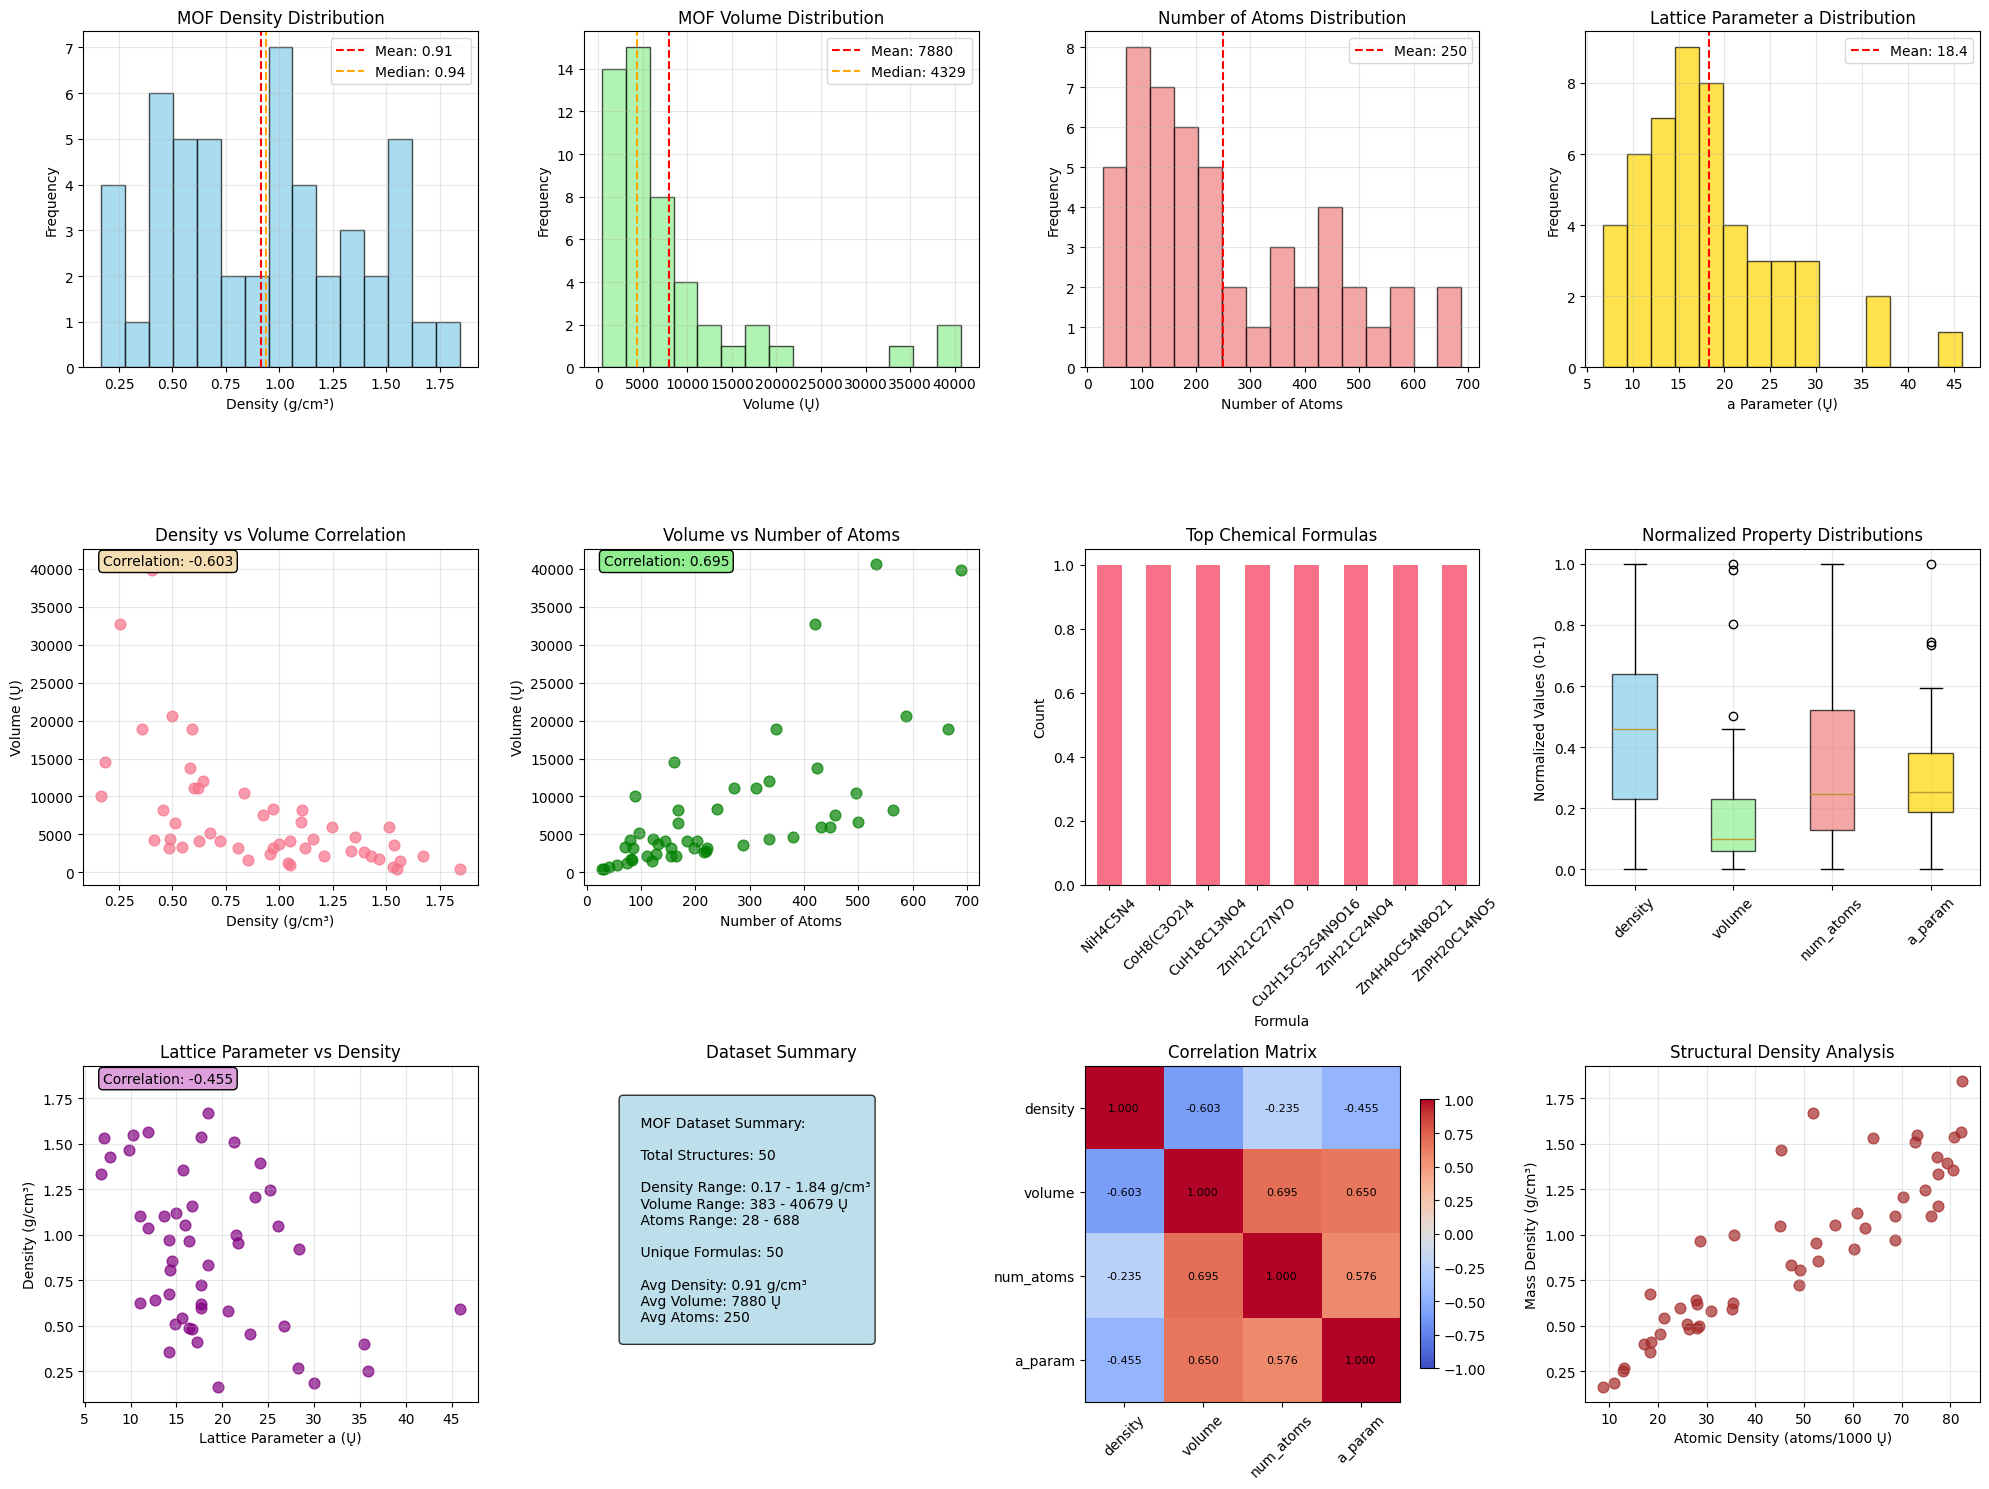


=== DETAILED STATISTICS ===
         density        volume   num_atoms    a_param
count  50.000000     50.000000   50.000000  50.000000
mean    0.913380   7880.395000  250.360000  18.362460
std     0.440503   9098.434278  178.049037   7.846305
min     0.166000    383.220000   28.000000   6.788000
25%     0.553000   2751.530000  114.000000  14.198000
50%     0.939500   4329.275000  191.000000  16.728500
75%     1.237750   9682.160000  372.000000  21.681750
max     1.845000  40678.840000  688.000000  45.918000

=== CHEMICAL FORMULA ANALYSIS ===
Unique formulas: 50

Top 5 most common formulas:
formula
NiH4C5N4            1
CoH8(C3O2)4         1
CuH18C13NO4         1
ZnH21C27N7O         1
Cu2H15C32S4N9O16    1
Name: count, dtype: int64


In [21]:
# Replace cell 7 with this corrected analysis
def analyze_mof_data(df):
    """Proper MOF data analysis with meaningful visualizations"""
    
    print("=== MOF DATASET ANALYSIS ===")
    print(f"Dataset shape: {df.shape}")
    print(f"Columns: {list(df.columns)}")
    print("\nFirst 5 rows:")
    print(df.head())
    
    # Check if we have actual MOF properties
    if 'density' not in df.columns or 'volume' not in df.columns:
        print("\nERROR: This appears to be file mapping data, not MOF properties data!")
        print("Please use the DataFrame from the CIF analysis (cell 4) instead.")
        return
    
    # Create comprehensive visualizations
    fig = plt.figure(figsize=(20, 15))
    
    # 1. Density Distribution
    plt.subplot(3, 4, 1)
    plt.hist(df['density'], bins=15, alpha=0.7, edgecolor='black', color='skyblue')
    plt.axvline(df['density'].mean(), color='red', linestyle='--', 
                label=f'Mean: {df["density"].mean():.2f}')
    plt.axvline(df['density'].median(), color='orange', linestyle='--', 
                label=f'Median: {df["density"].median():.2f}')
    plt.title('MOF Density Distribution')
    plt.xlabel('Density (g/cm³)')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 2. Volume Distribution
    plt.subplot(3, 4, 2)
    plt.hist(df['volume'], bins=15, alpha=0.7, edgecolor='black', color='lightgreen')
    plt.axvline(df['volume'].mean(), color='red', linestyle='--', 
                label=f'Mean: {df["volume"].mean():.0f}')
    plt.axvline(df['volume'].median(), color='orange', linestyle='--', 
                label=f'Median: {df["volume"].median():.0f}')
    plt.title('MOF Volume Distribution')
    plt.xlabel('Volume (Ų)')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 3. Number of Atoms Distribution
    plt.subplot(3, 4, 3)
    plt.hist(df['num_atoms'], bins=15, alpha=0.7, edgecolor='black', color='lightcoral')
    plt.axvline(df['num_atoms'].mean(), color='red', linestyle='--', 
                label=f'Mean: {df["num_atoms"].mean():.0f}')
    plt.title('Number of Atoms Distribution')
    plt.xlabel('Number of Atoms')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 4. Lattice Parameter Distribution
    plt.subplot(3, 4, 4)
    plt.hist(df['a_param'], bins=15, alpha=0.7, edgecolor='black', color='gold')
    plt.axvline(df['a_param'].mean(), color='red', linestyle='--', 
                label=f'Mean: {df["a_param"].mean():.1f}')
    plt.title('Lattice Parameter a Distribution')
    plt.xlabel('a Parameter (Ų)')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 5. Density vs Volume Correlation
    plt.subplot(3, 4, 5)
    plt.scatter(df['density'], df['volume'], alpha=0.7, s=60)
    plt.xlabel('Density (g/cm³)')
    plt.ylabel('Volume (Ų)')
    plt.title('Density vs Volume Correlation')
    corr = df['density'].corr(df['volume'])
    plt.text(0.05, 0.95, f'Correlation: {corr:.3f}', 
             transform=plt.gca().transAxes, 
             bbox=dict(boxstyle="round", facecolor='wheat'))
    plt.grid(True, alpha=0.3)
    
    # 6. Volume vs Number of Atoms
    plt.subplot(3, 4, 6)
    plt.scatter(df['num_atoms'], df['volume'], alpha=0.7, s=60, color='green')
    plt.xlabel('Number of Atoms')
    plt.ylabel('Volume (Ų)')
    plt.title('Volume vs Number of Atoms')
    corr = df['num_atoms'].corr(df['volume'])
    plt.text(0.05, 0.95, f'Correlation: {corr:.3f}', 
             transform=plt.gca().transAxes, 
             bbox=dict(boxstyle="round", facecolor='lightgreen'))
    plt.grid(True, alpha=0.3)
    
    # 7. Chemical Formula Distribution
    plt.subplot(3, 4, 7)
    formula_counts = df['formula'].value_counts().head(8)
    formula_counts.plot(kind='bar')
    plt.title('Top Chemical Formulas')
    plt.xlabel('Formula')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    
    # 8. Box plots for all numerical properties
    plt.subplot(3, 4, 8)
    numerical_cols = ['density', 'volume', 'num_atoms', 'a_param']
    df_normalized = df[numerical_cols].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
    
    bp = plt.boxplot([df_normalized[col] for col in numerical_cols], 
                     labels=numerical_cols, patch_artist=True)
    colors = ['skyblue', 'lightgreen', 'lightcoral', 'gold']
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    plt.title('Normalized Property Distributions')
    plt.ylabel('Normalized Values (0-1)')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    
    # 9. Density vs Lattice Parameter
    plt.subplot(3, 4, 9)
    plt.scatter(df['a_param'], df['density'], alpha=0.7, s=60, color='purple')
    plt.xlabel('Lattice Parameter a (Ų)')
    plt.ylabel('Density (g/cm³)')
    plt.title('Lattice Parameter vs Density')
    corr = df['a_param'].corr(df['density'])
    plt.text(0.05, 0.95, f'Correlation: {corr:.3f}', 
             transform=plt.gca().transAxes, 
             bbox=dict(boxstyle="round", facecolor='plum'))
    plt.grid(True, alpha=0.3)
    
    # 10. Summary Statistics Table
    plt.subplot(3, 4, 10)
    plt.axis('off')
    stats_text = f"""
    MOF Dataset Summary:
    
    Total Structures: {len(df)}
    
    Density Range: {df['density'].min():.2f} - {df['density'].max():.2f} g/cm³
    Volume Range: {df['volume'].min():.0f} - {df['volume'].max():.0f} Ų
    Atoms Range: {df['num_atoms'].min()} - {df['num_atoms'].max()}
    
    Unique Formulas: {df['formula'].nunique()}
    
    Avg Density: {df['density'].mean():.2f} g/cm³
    Avg Volume: {df['volume'].mean():.0f} Ų
    Avg Atoms: {df['num_atoms'].mean():.0f}
    """
    plt.text(0.1, 0.9, stats_text, fontsize=10, verticalalignment='top',
             bbox=dict(boxstyle="round", facecolor='lightblue', alpha=0.8))
    plt.title('Dataset Summary')
    
    # 11. Correlation Heatmap
    plt.subplot(3, 4, 11)
    corr_matrix = df[numerical_cols].corr()
    im = plt.imshow(corr_matrix, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
    plt.colorbar(im, shrink=0.8)
    plt.xticks(range(len(numerical_cols)), numerical_cols, rotation=45)
    plt.yticks(range(len(numerical_cols)), numerical_cols)
    
    # Add correlation values
    for i in range(len(numerical_cols)):
        for j in range(len(numerical_cols)):
            plt.text(j, i, f'{corr_matrix.iloc[i, j]:.3f}', 
                    ha='center', va='center', fontsize=8)
    
    plt.title('Correlation Matrix')
    
    # 12. Structure Complexity Analysis
    plt.subplot(3, 4, 12)
    df['atoms_per_volume'] = df['num_atoms'] / df['volume'] * 1000  # atoms per 1000 Ų
    plt.scatter(df['atoms_per_volume'], df['density'], alpha=0.7, s=60, color='brown')
    plt.xlabel('Atomic Density (atoms/1000 Ų)')
    plt.ylabel('Mass Density (g/cm³)')
    plt.title('Structural Density Analysis')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed statistics
    print("\n=== DETAILED STATISTICS ===")
    print(df[numerical_cols].describe())
    
    print(f"\n=== CHEMICAL FORMULA ANALYSIS ===")
    print(f"Unique formulas: {df['formula'].nunique()}")
    print("\nTop 5 most common formulas:")
    print(df['formula'].value_counts().head())

# Fixed data loading and analysis
def load_and_analyze_mof_data():
    """Load MOF data from CIFs and perform proper analysis"""
    
    cif_directory = '../test_set_cifs/'
    results = []
    
    if not os.path.exists(cif_directory):
        print(f"Directory not found: {cif_directory}")
        return None
    
    print("Processing CIF files...")
    cif_files = [f for f in os.listdir(cif_directory) if f.endswith('.cif')]
    
    # Process more files for better analysis (increase from 5 to 50 or all)
    max_files = min(50, len(cif_files))  # Process up to 50 files
    
    for i, cif_file in enumerate(cif_files[:max_files]):
        try:
            structure = Structure.from_file(os.path.join(cif_directory, cif_file))
            results.append({
                'filename': cif_file,
                'formula': str(structure.composition.reduced_formula),
                'density': round(structure.density, 3),
                'volume': round(structure.volume, 2),
                'num_atoms': len(structure),
                'a_param': round(structure.lattice.a, 3),
                'b_param': round(structure.lattice.b, 3),
                'c_param': round(structure.lattice.c, 3)
            })
            
            if (i + 1) % 10 == 0:
                print(f"Processed {i + 1}/{max_files} files...")
                
        except Exception as e:
            print(f"Error processing {cif_file}: {e}")
    
    if results:
        mof_df = pd.DataFrame(results)
        print(f"\nSuccessfully processed {len(mof_df)} MOF structures")
        return mof_df
    else:
        print("No structures could be processed")
        return None

# Execute the corrected analysis
mof_data = load_and_analyze_mof_data()
if mof_data is not None:
    analyze_mof_data(mof_data)
else:
    print("Failed to load MOF data for analysis")